In [33]:
import openpyxl
import networkx as nx
import matplotlib as mpl # Graficador
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

nc = 5

libro = openpyxl.load_workbook('Formulario sin título (Respuestas).xlsx' ,data_only=True)

hoja = libro.active

##[fila] [columnas
##las filas no inician de 0 si no de 1

nf = hoja.max_row
print("Numero de personas: " + str(nf))
print(" ")

position = 'F'
position += str(nf)

celdas = hoja['B2' : position]

matriz =[]

for fila in celdas:
    persona = [celda.value for celda in fila]
    matriz.append(persona)
    


def similitudes(palabra1, palabra2):
    conter = 0
    pal1 = []
    pal2 = []
    aux=""
    for i in palabra1:
        if (i == ' ' and aux == ""):
            continue
        elif(i != ','):
            aux += i
        else:
            pal1.append(aux)
            aux = ""
    if(aux != ""):
        pal1.append(aux)
    aux = ""
    for i in palabra2:
        if (i == ' ' and aux == ""):
            continue
        elif(i != ','):
            aux += i
        else:
            pal2.append(aux)
            aux = ""
    if(aux != ""):
        pal2.append(aux)
    
    for sim in pal1:
        if(sim in pal2):
            conter +=1
    return conter
            
        

relaciones = []

relaciones = [[0 for j in range(nf-1)] for i in range(nf-1)]


for fila in range(nf-1):
    palabra1 = ""
    for colExcel in range(1,5):
        if(matriz[fila][colExcel] == None):
            continue
        else:
            palabra1 +=matriz[fila][colExcel] +", "
    for col in range(nf-1):
        palabra2 = ""
        if(col == fila):
            relaciones[fila][col] = 0
            continue
        for colExcel in range(1,5):
            if(matriz[col][colExcel] == None):
                continue
            else:
                palabra2 +=matriz[col][colExcel] +", "
        relaciones[fila][col] = similitudes(palabra1, palabra2)
                

print("Lista de personas:\n")
            
for person in range(nf-1):
    print(person+1, ". ", matriz[person][0], sep='')
print("\n") 


Numero de personas: 8
 
Lista de personas:

1. Gabriel
2. Felipe
3. MJ
4. Jonathan 
5. Maria Fernanda Aragón Bautista 
6. Julián
7. Pipe




In [34]:
print("Matriz de adyacencia: \n")

for i in range(nf+1):
     print(("───").center(3), end= '')
print()


print("   ║", end='')
for i in range(nf-1):
    if(i<10):
        print((' ' + str(i+1)).center(3), end= '')
    else:
        print(str(i+1).center(3), end= '')
print()
        
for i in range(nf+1):
     print(("───").center(3), end= '')
print()

for fila in range(nf-1):
    print(str(fila+1).center(2),"║",end='')
    for col in range(nf-1):
        if(relaciones[fila-1][col]<10):
            print((' ' + str(relaciones[fila][col])).center(3), end= '')
        else:
            print(str(relaciones[fila-1][col]).center(3), end= '')
    print(" ║")

for i in range(nf+1):
     print(("───").center(3), end= '')
print()

Matriz de adyacencia: 

───────────────────────────
   ║  1  2  3  4  5  6  7
───────────────────────────
1  ║  0  6  3  1  4  4  7 ║
2  ║  6  0  2  1  6  2  4 ║
3  ║  3  2  0  2  0  1  3 ║
4  ║  1  1  2  0  1  2  3 ║
5  ║  4  6  0  1  0  1  5 ║
6  ║  4  2  1  2  1  0  2 ║
7  ║  7  4  3  3  5  2  0 ║
───────────────────────────


In [35]:
class nodo:
    def __init__(self, nombre, idd):
        self.nombre = nombre
        self.idd = idd
    
    def __str__(self):
        return str(self.idd)
    
    def getNombre(self):
        name = str(self.nombre)
        return name
    
    def getGustos(self):
        return self.gustos
    
    def getId(self):
        return self.idd

In [36]:
#Funcion qeu retorna el numero de gustos totales que marcó la persona en el formulario

grafo = nx.Graph()
nodos = []
colores = []
for fila in range(nf-1):
    nodos.append(nodo(str(matriz[fila][0]), int(fila+1)))

grafo.add_nodes_from(nodos)

In [37]:
for fila in range(nf-1):
    for col in range(nf-1):
        if(relaciones[fila][col] != 0):
            color = ""
            grafo.add_edge(nodos[fila], nodos[col], weight=relaciones[fila][col])

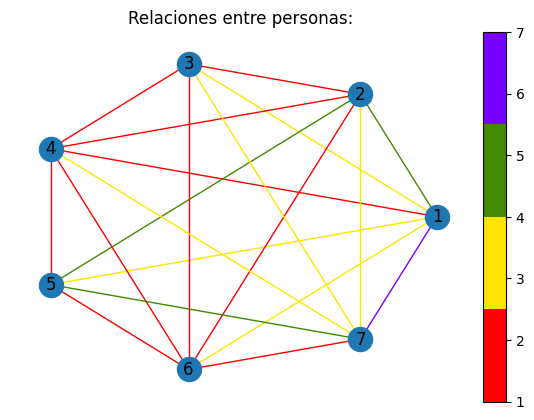

In [38]:
plt.subplot()
pos = nx.layout.circular_layout(grafo)
c = ["#FF0000","#FFE400","#428A02","#7800FF"]  
colores = []
for (u,v) in grafo.edges:
        if(grafo[u][v]['weight'] == 1 or grafo[u][v]['weight']==2):
            colores.append("#FF0000")
        elif(grafo[u][v]['weight'] == 3 or grafo[u][v]['weight'] == 4):
            colores.append("#FFE400")
        elif(grafo[u][v]['weight'] == 5 or grafo[u][v]['weight'] == 6):
            colores.append("#428A02")
        elif(grafo[u][v]['weight'] >= 7):
            colores.append( "#7800FF")
nx.draw(grafo,pos=pos,edge_color=colores,edge_cmap=plt.cm.rainbow)
nx.draw_networkx_labels(grafo, pos)

plt.title("Relaciones entre personas: ")

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)

cmap = mpl.colors.ListedColormap(c)
bounds = [0, 3, 5, 7]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

pesosw = list([grafo[u][v]['weight'] for (u, v) in grafo.edges()])
norm = mpl.colors.Normalize(vmin=min(pesosw), vmax=max(pesosw))
cb1 = mpl.colorbar.ColorbarBase(ax=ax_cb, cmap=cmap, norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb)


plt.show()

In [39]:
#Los siguientes vectores almacenan las parejas de personas de acuerdo con su compatibilidad, donde compB es baja, compM es media, compA es alta, compMa es MUY ALTA

compB = []
compM = []
compA = []
compMa = []


#Se crea una matriz donde cada fila representa una persona del grafo, la primera columna almacena el numero de relaciones de la persona y la segunda la suma de los pesos de esas relaciones
#Se usa nf-1 ya que esa es la cantidad de personas que hay en el grafo

valor = [[0 for j in range(2)] for i in range(nf-1)]

for i in range(nf-1):
    #Se inicia desde i+1 para que no se lea la matriz completa sino solo el triangulo superior que tiene los mismos datos que el inferior
    for j in range(i+1, nf-1):   

        if(relaciones[i][j] <= 2 and relaciones[i][j] != 0 ):
            compB.append(str(celdas[i][0].value) + "-" +str(celdas[j][0].value))
        elif(relaciones[i][j] <= 4 and relaciones[i][j] != 0 ):
            compM.append(str(celdas[i][0].value) + "-" +str(celdas[j][0].value))
        elif(relaciones[i][j] <= 6 and relaciones[i][j] != 0 ):
            compA.append(str(celdas[i][0].value) + "-" +str(celdas[j][0].value))
        elif(relaciones[i][j] != 0 ):
            compMa.append(str(celdas[i][0].value) + "-" +str(celdas[j][0].value))
        
        if(relaciones[i][j] != 0):
            valor[i][0]+=1
            valor[j][0]+=1
        valor[i][1]+=relaciones[i][j]
        valor[j][1]+=relaciones[i][j]



print("De este grupo las siguientes personas presentan una posible compatibilidad baja:")
print(compB)
print("")
print("De este grupo las siguientes personas presentan una posible compatibilidad media:")
print(compM)
print("")
print("De este grupo las siguientes personas presentan una posible compatibilidad alta:")
print(compA)
print("")
print("De este grupo las siguientes personas presentan una posible compatibilidad muy alta:")
print(compMa)
print("")
print(valor)

print()



De este grupo las siguientes personas presentan una posible compatibilidad baja:
['Gabriel-Jonathan ', 'Felipe-MJ', 'Felipe-Jonathan ', 'Felipe-Julián', 'MJ-Jonathan ', 'MJ-Julián', 'Jonathan -Maria Fernanda Aragón Bautista ', 'Jonathan -Julián', 'Maria Fernanda Aragón Bautista -Julián', 'Julián-Pipe']

De este grupo las siguientes personas presentan una posible compatibilidad media:
['Gabriel-MJ', 'Gabriel-Maria Fernanda Aragón Bautista ', 'Gabriel-Julián', 'Felipe-Pipe', 'MJ-Pipe', 'Jonathan -Pipe']

De este grupo las siguientes personas presentan una posible compatibilidad alta:
['Gabriel-Felipe', 'Felipe-Maria Fernanda Aragón Bautista ', 'Maria Fernanda Aragón Bautista -Pipe']

De este grupo las siguientes personas presentan una posible compatibilidad muy alta:
['Gabriel-Pipe']

[[6, 25], [6, 21], [5, 11], [6, 10], [5, 17], [6, 12], [6, 24]]



In [40]:
continuar = True
dato = ""
while(continuar):
    print("Menu\n1) Ver resultados genereales del grupo.\n2)Buscar resultado por persona.\n3)Encontrar el más compatible con todo el grupo.\n4)Generar equipos de trabajo.\n5)Mostrar grafo del grupo.\n6)Salir.")
    dato = int(input())
    if(dato==1):
        print("De este grupo las siguientes personas presentan una posible compatibilidad baja:")
        print(compB)
        print("")
        print("De este grupo las siguientes personas presentan una posible compatibilidad media:")
        print(compM)
        print("")
        print("De este grupo las siguientes personas presentan una posible compatibilidad alta:")
        print(compA)
        print("")
        print("De este grupo las siguientes personas presentan una posible compatibilidad muy alta:")
        print(compMa)
    elif(dato==5):
        continuar=False


Menu
1) Ver resultados genereales del grupo.
2)Buscar resultado por persona.
3)Encontrar el más compatible con todo el grupo.
4)Generar equipos de trabajo.
5)Mostrar grafo del grupo.
6)Salir.
